# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.7.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.001 # start off with high rate first 0.001 and experiment with reducing it gradually 

In [3]:
print(NUM_CLASSES)

2


#### Generate Training and Validation Batches

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


C:\Users\kpete\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [5]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation, DenseFeatures, Dropout, Conv2D, MaxPool2D, Flatten

vggmodel = tf.keras.applications.VGG16(
    weights="imagenet",  
    input_shape=(224, 224, 3),
    include_top=False  
)  
vggmodel.trainable = False



model = Sequential(
    [
        vggmodel,
        Flatten(),
        
        Dense(units = 256,activation='relu', name = 'dense_feature'),
        
        Dense(units = 1, activation = 'sigmoid', name = 'dense_1')
    ]
)

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer = opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])



model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_feature (Dense)       (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


#### [5 points] Train Model

In [10]:

print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

history = model.fit_generator(steps_per_epoch = STEP_SIZE_TRAIN, generator = train_batches, validation_data = valid_batches, validation_steps = STEP_SIZE_VALID,
                    epochs=45
)


11
3
Epoch 1/45


C:\Users\kpete\AppData\Local\Temp/ipykernel_23760/3129912149.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(steps_per_epoch = STEP_SIZE_TRAIN, generator = train_batches, validation_data = valid_batches, validation_steps = STEP_SIZE_VALID,


10/10 [==============================] - 8s 818ms/step - loss: 0.1048 - accuracy: 0.9574 - val_loss: 0.0564 - val_accuracy: 1.0000
Epoch 2/45
10/10 [==============================] - 8s 770ms/step - loss: 0.1762 - accuracy: 0.9362 - val_loss: 0.2605 - val_accuracy: 0.9000
Epoch 3/45
10/10 [==============================] - 8s 781ms/step - loss: 0.1511 - accuracy: 0.9468 - val_loss: 0.1053 - val_accuracy: 0.9000
Epoch 4/45
10/10 [==============================] - 8s 768ms/step - loss: 0.1355 - accuracy: 0.9362 - val_loss: 0.1507 - val_accuracy: 0.9500
Epoch 5/45
10/10 [==============================] - 8s 751ms/step - loss: 0.1235 - accuracy: 0.9468 - val_loss: 0.1169 - val_accuracy: 0.9500
Epoch 6/45
10/10 [==============================] - 8s 761ms/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.0739 - val_accuracy: 1.0000
Epoch 7/45
10/10 [==============================] - 8s 768ms/step - loss: 0.1141 - accuracy: 0.9362 - val_loss: 0.1564 - val_accuracy: 0.9000
Epoch 8/45
10/10 

#### [5 points] Plot Accuracy and Loss During Training

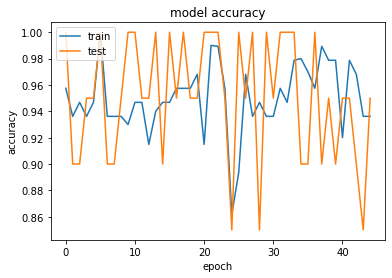

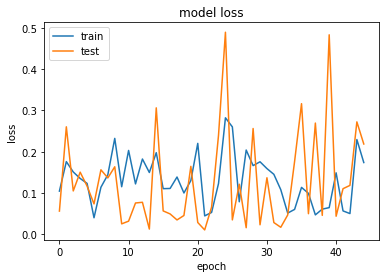

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Plot Test Results

Found 18 images belonging to 2 classes.
 1/18 [>.............................] - ETA: 1s

C:\Users\kpete\AppData\Local\Temp/ipykernel_23760/1882219165.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(eval_generator,18,verbose=1)


18/18 [==============================] - 2s 82ms/step
covid\nejmoa2001191_f3-PA.jpeg


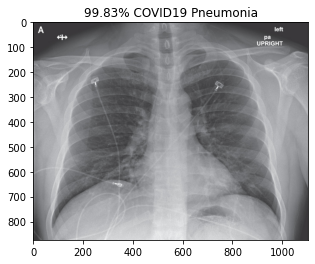

covid\nejmoa2001191_f4.jpeg


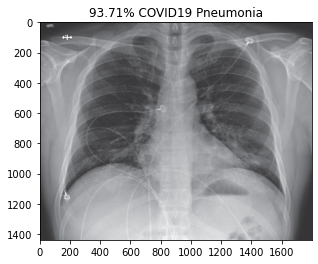

covid\nejmoa2001191_f5-PA.jpeg


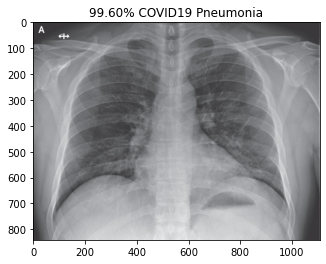

covid\radiol.2020200490.fig3.jpeg


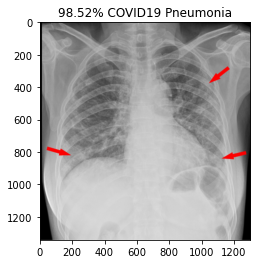

covid\ryct.2020200028.fig1a.jpeg


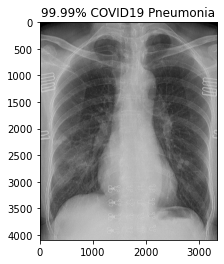

covid\ryct.2020200034.fig2.jpeg


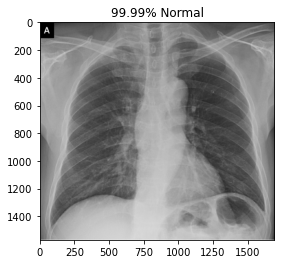

covid\ryct.2020200034.fig5-day0.jpeg


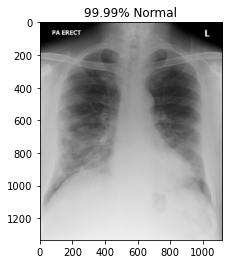

covid\ryct.2020200034.fig5-day4.jpeg


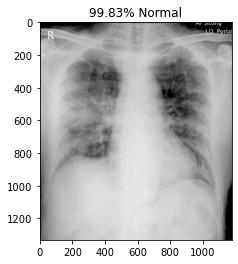

covid\ryct.2020200034.fig5-day7.jpeg


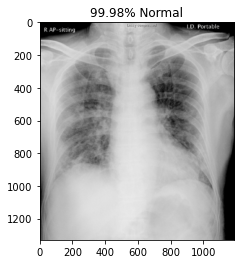

normal\NORMAL2-IM-1385-0001.jpeg


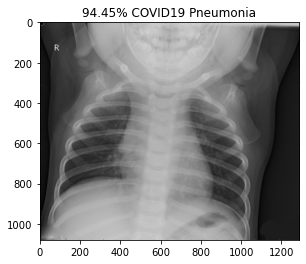

normal\NORMAL2-IM-1396-0001.jpeg


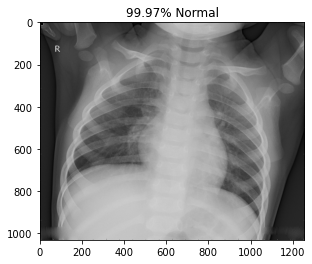

normal\NORMAL2-IM-1400-0001.jpeg


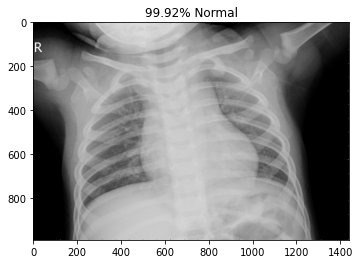

normal\NORMAL2-IM-1401-0001.jpeg


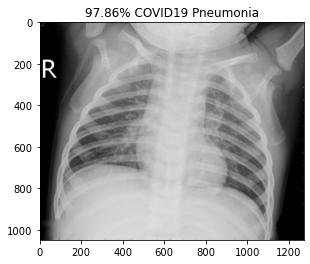

normal\NORMAL2-IM-1406-0001.jpeg


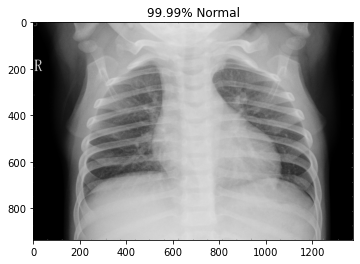

normal\NORMAL2-IM-1412-0001.jpeg


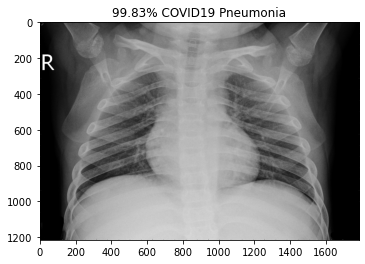

normal\NORMAL2-IM-1419-0001.jpeg


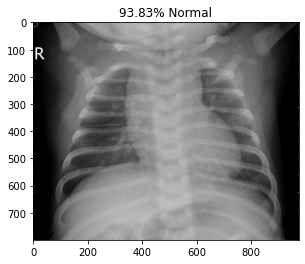

normal\NORMAL2-IM-1422-0001.jpeg


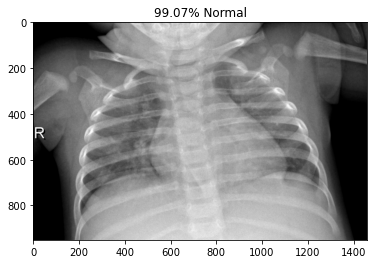

normal\NORMAL2-IM-1423-0001.jpeg


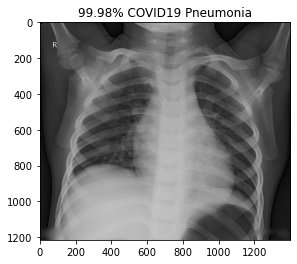

In [14]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.
{'covid': 0, 'normal': 1}
  1/130 [..............................] - ETA: 21s

C:\Users\kpete\AppData\Local\Temp/ipykernel_23760/410331126.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  X = intermediate_layer_model.predict_generator(tsne_data_generator, verbose=1)


130/130 [==============================] - 10s 76ms/step


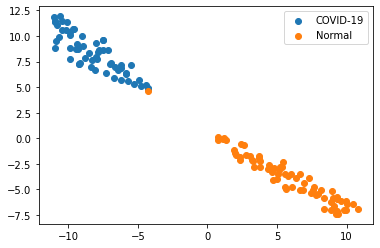

In [15]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

labels = tsne_data_generator.classes
print(tsne_data_generator.class_indices)



X = intermediate_layer_model.predict_generator(tsne_data_generator, verbose=1)
X_embedded = TSNE().fit_transform(X)

classes = ["COVID-19", "Normal"]

for i in range(2):
    clusters = X_embedded[np.where(labels == i)]
    plt.scatter(clusters[:, 0], clusters[:, 1], label = classes[i])

plt.legend()




<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->